Data Cleaning and preprocessing is the most critical step in any Data science project . Data cleaning is the process of transforming row dataset into understandable format.Real world data is often incomplete,inaccurate , inconsistent and noisy.

There is no doubt that datascientist job is the **"sexiest job of the 21'st century"**, But what data scientists spend the most time doing?? Most data scientists spend only 20 percent of their time on actual data modelling and 80 percent of their time finding, cleaning, and reorganizing huge amounts of data.

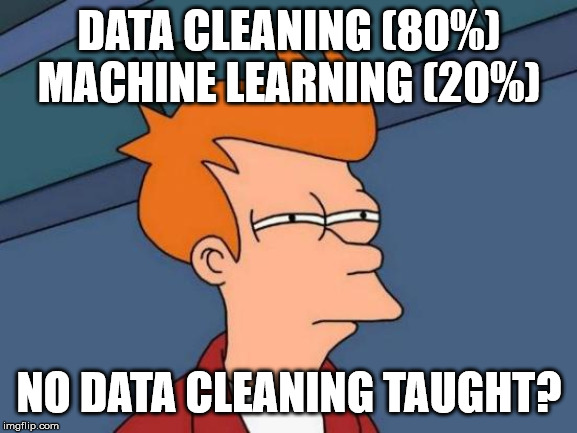

**In this blog post, I am going to clean and prepare the dataset. And by saying that I mean , i am going to transform dataset from messy to tidy and make it useful for machine learning models.**

**Let me tell you what I will cover -**

  1. Why Data Cleaning and Preprocessing is Important 
  
   
  2. About Dataset 
  
  
  3. Handling Missing values 


  4. Handling Outliers

  
  5. Encoding categorical features


  6. Feature scaling 

  
  7. Feature Selection and Feature Engineering 
  

  So , let's get started 
    

# 1. Why Data Cleaning and Preprocessing is Important ?

Before we start discussing data cleaning and preprocessing and it's importance. Let's first discuss about Datascience pipeline.

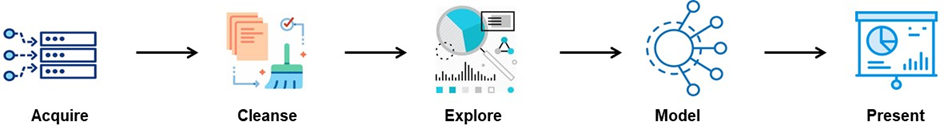


**Acquire** :  This step involves the proper understanding of the question we are trying to answer and having enough knowledge about the data.


**Cleanse** : Cleansing involves understanding dataquality issues like unnecessary data, duplication, resolving missing values etc.This is an essential step in the pipeline as the machine learning models’ accuracy heavily depends on the data.

**Explore** : This part involves understanding the data and patterns before going on to build a model. This step is used to understand the importance of different variables, the relationship between different variables, understanding the data distributions, and forming hypothesis.

**Model** : This part involves creating statistical or machine learning models for prediction. The outcome of this process is making inferences, predicting a future event, or providing the “cause” for an event.

**Present** : The findings from the model need to be presented, in most cases, to a non-technical audience. This is in the form of summary writeups, charts, PowerPoints, etc.

Training ML algorithms and utilizing them to predict the target variable is the easy,because of various libraries and packages available in Python and R. Collecting data and cleaning it can be a lot of work, I don’t think this part particularly hard. It’s definitely important and may require careful planning.

**Why is it Important ?**

When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled. If data is incorrect, outcomes from algorithms will also be incorrrect , even though they may look correct.This step is crucial because wrong data can drive a business to wrong decisions, conclusions, and poor analysis, especially if the huge quantities of big data are into the picture.



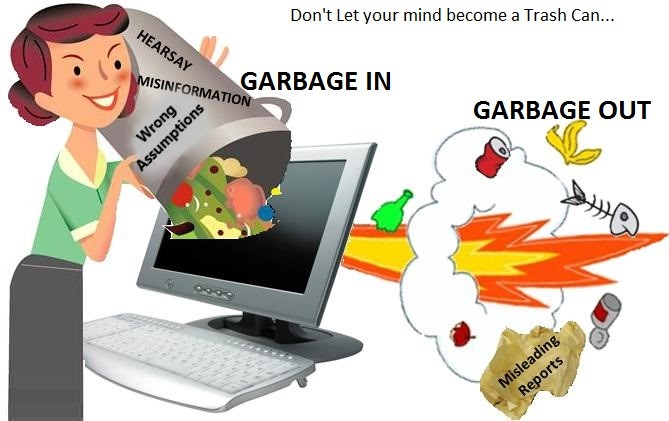

# 2. About Dataset


**Zillow’s Home Value Prediction (Zestimate)**

Zillow’s Zestimate home valuation has shaken up the U.S. real estate industry since first released 11 years ago.

Zillow Prize, a competition with a *one million dollar grand prize* ( 3 years ago ), participants was required to develop an algorithm that makes predictions about the future sale prices of homes.

I am going to clean and prepare this dataset.

  **For more information about the dataset you can refer** - https://www.kaggle.com/c/zillow-prize-1
 

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno 
from sklearn import linear_model
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
pd.set_option("display.max_columns", 100)

In [2]:

properties = pd.read_csv('/content/properties_2017.csv')

for c, dtype in zip(properties.columns, properties.dtypes):	
    if dtype == np.float64:		
        properties[c] = properties[c].astype(np.float32)

In [3]:
properties.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037,NaN,NaN,NaN,NaN,NaN,NaN,34144442,-118654084,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269,NaN,60378004.0,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037,NaN,NaN,NaN,NaN,NaN,NaN,34140430,-118625364,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261,LCA11*,60378000.0,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037,NaN,NaN,NaN,NaN,NaN,NaN,33989359,-118394633,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47,LAC2,60377032.0,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,1959.0,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.369141,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037,NaN,NaN,NaN,NaN,NaN,NaN,34148863,-118437206,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47,LAC2,60371412.0,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.570312,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037,NaN,NaN,NaN,NaN,NaN,NaN,34194168,-118385816,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31,LAM1,60371232.0,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.169922,NaN,NaN,NaN


# 3. Handling Missing values in Dataset 


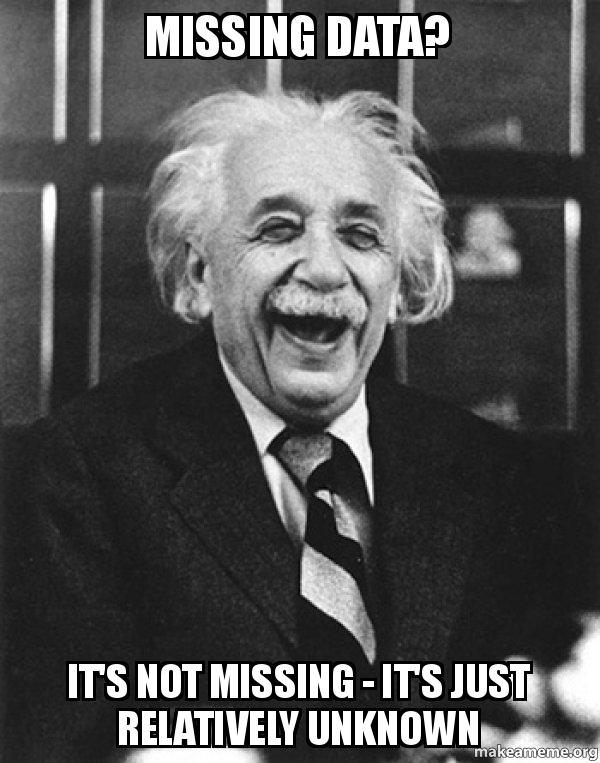

## 3.1  Types of Missing values 

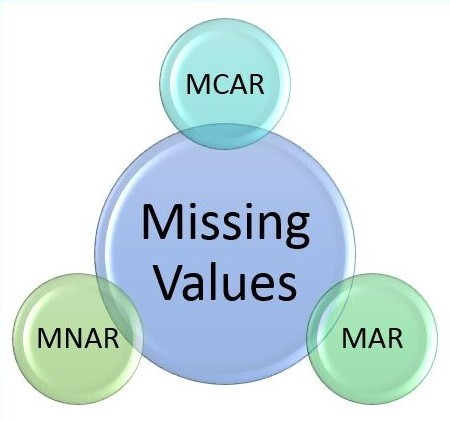

**MCAR(Missing Completely at Random)**  means there is no relationship between the missingness of the data and any values, observed or missing. In other words, there is no particular reason for the missing values.

**MAR(Missing At Random)** MAR occurs when the missingness is not random, but where missingness can be fully accounted for by variables where there is complete information.

**MNAR(Missing Not at Random)** - Missingness depends on unobserved data or the value of the missing data itself.


## 3.2 Detecting Missing values

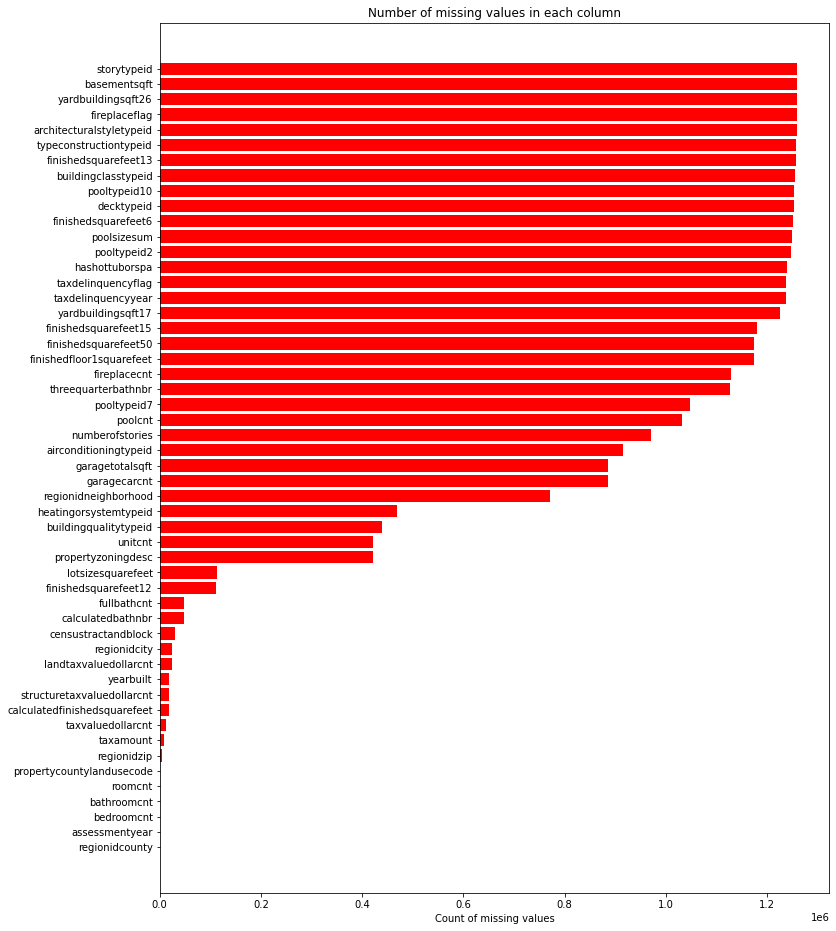

In [4]:
missing_df = properties.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
fig, ax = plt.subplots(figsize=(12,16))
rects = ax.barh(ind, missing_df.missing_count.values, color='red')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

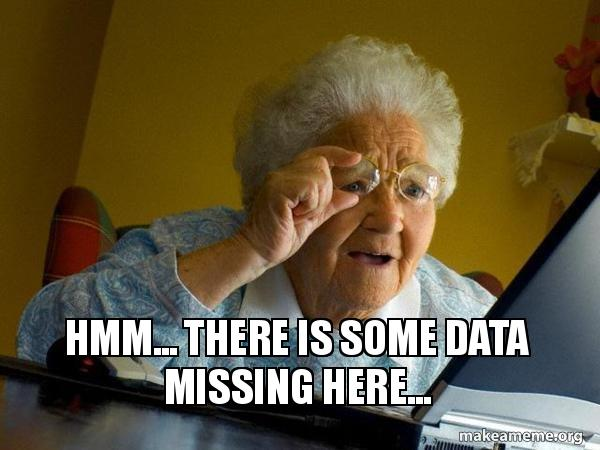


## 3.3 Visualising relationship between columns using HeatMap


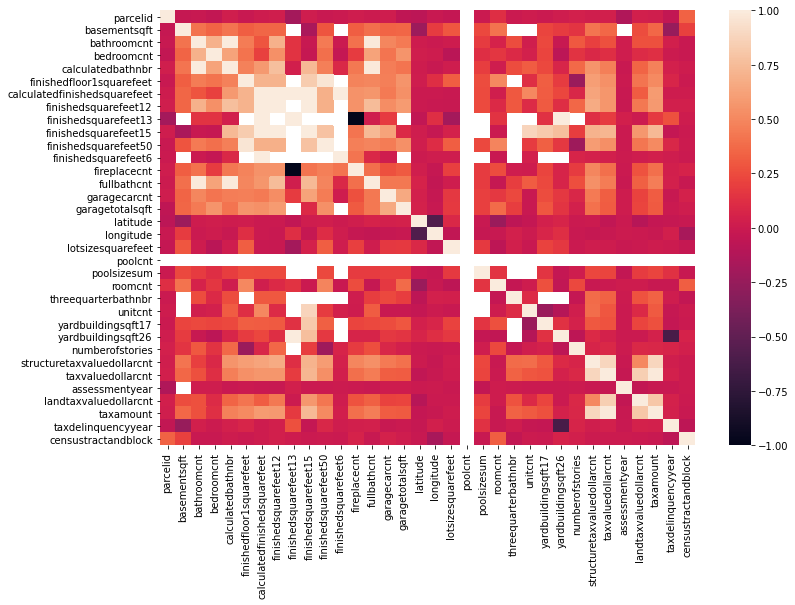

<Figure size 432x288 with 0 Axes>

In [5]:
#Identify numerical columns to produce a heatmap
categorical_cols = ['airconditioningtypeid','architecturalstyletypeid','buildingqualitytypeid','buildingclasstypeid','decktypeid','fips',
                    'hashottuborspa','heatingorsystemtypeid','pooltypeid10','pooltypeid2','pooltypeid7','propertycountylandusecode',
                    'propertylandusetypeid','propertyzoningdesc','rawcensustractandblock','regionidcity','regionidcounty','regionidneighborhood',
                    'regionidzip','storytypeid','typeconstructiontypeid','yearbuilt','taxdelinquencyflag','fireplaceflag']

numerical_cols = [x for x in properties.columns if x not in categorical_cols]

#Lets start by plotting a heatmap to determine if any variables are correlated
plt.figure(figsize = (12,8))
sns.heatmap(data=properties[numerical_cols].corr())
plt.show()
plt.gcf().clear()

calculatedfinishedsquarefeet' , 'finishedsquarefeet12' , 'finishedsquarefeet13' , 'finishedsquarefeet15' , 'finishedsquarefeet6' , 'finishedsquarefeet50' are strongly related and they represent very similair pieces of information (the area of the property)

lets pick the one with the fewest number of missing values and drop the rest

**Note:** I am creating dropcolumn list which will contain all the columns to be deleted.

In [6]:
# 'calculatedfinishedsquarefeet' has the fewest missing values so lets remove the others
dropcolumns = ['finishedsquarefeet12','finishedsquarefeet13', 'finishedsquarefeet15','finishedsquarefeet6','finishedsquarefeet50']

#'bathroomcnt' and 'calculatedbathnbr' and 'fullbathcnt' represent same information as well. Choose 'bathroomcnt' as has no missing values, so remove the other two.
dropcolumns.append('calculatedbathnbr')
dropcolumns.append('fullbathcnt')

 ## 3.4  Basic Imputation Methods 

### 1. Pairwise Deletion

Parwise Deletion is used when values are missing completely at random i.e MCAR. During Pairwise deletion, only the missing values are deleted. 

### 2. Listwise Deletion/ Dropping rows

During Listwise deletion, complete rows(which contain the missing values) are deleted. As a result, it is also called Complete Case deletion. Like Pairwise deletion, listwise deletions are also only used for MCAR .

### 3. Dropping complete columns

If a column contains a lot of missing values, say more than 90%(some threshold), you might want to delete that feature. However, This is however not recommended as it might result in loss of information from the dataset.

### 4. Deductive Imputation

Sometimes, from the pattern of responses of the other items, the missing responses to an item can be deduced with certainty.For example , university faculty member may be considered to have degree holder.

Disadvantage to this approach is that the occasions when it can be applied are quite rare.

### 5. Constant Imputation 

- Imputating with a constant value
- Imputation using the statistics (mean, median or most frequent) of the missing value column.

**why not impute the missing data with the Measure of Central Tendency of the variable?**

When we replace the missing data with some common value we might under(over)estimate it. In other words, we are adding some bias to our estimation. For example, a person who earns just enough to meet his daily needs might not be comfortable in mentioning his salary, and thus the value for the variable salary would be missing for such a person. However, if we impute it with the mean value of the variable, we are overestimating that person's salary and thus introducing bias in our analysis.


**Let's see how we can use following methods in our dataset**

* **'pooltypeid10'** -  Spa or Hot Tub

* **'pooltypeid2'**-   Pool with Spa/Hot Tub

* **'pooltypeid7'** -  Pool without hot tub

* **'hashottuborspa'** -  Does the home have a hot tub or spa
 
* **poolcnt** - Number of pools on the lot (if any)

We can remove one of the pooltypeid10 and pooltypeid2, as it convey same information, removing pooltypeid10 as it has more missing values


In [7]:
dropcolumns.append('pooltypeid10')

replace 'NA' with **None**  as NA here means pool doesnot exists 

In [8]:
properties['hashottuborspa']=properties['hashottuborspa'].fillna("None")
properties['pooltypeid2']=properties['pooltypeid2'].fillna("None")


Replace 'pooltypeid7' NA with 0 as 1 shows 'Pool without hot tub' so 0 will show 'Pool with hot tub'

In [9]:
properties["pooltypeid7"]=properties["pooltypeid7"].fillna(0)

Replace 'poolcnt' NA with 0 (No pool)

In [10]:
properties['poolcnt'] = properties['poolcnt'].fillna(0)

Fill in those properties that have a pool with median pool value

In [11]:
poolsizesum_median = properties.loc[properties['poolcnt'] > 0, 'poolsizesum'].median()
properties.loc[(properties['poolcnt'] > 0) & (properties['poolsizesum'].isnull()), 'poolsizesum'] = poolsizesum_median

If it doesn't have a pool then poolsizesum is 0 by default

In [12]:
properties.loc[(properties['poolcnt'] == 0), 'poolsizesum'] = 0

Missing values in fireplaceflag and fireplacecnt should be same , but it is not, so I am changing fireplaceflag to "No" when fireplacecnt is 0 otherwise "Yes".

In [13]:
properties['fireplaceflag'].isnull().sum(),properties['fireplacecnt'].isnull().sum()

(1258426, 1128219)

In [14]:
properties['fireplaceflag']= "No"
properties.loc[properties['fireplacecnt']>0,'fireplaceflag']= "Yes"

In [15]:
properties['fireplacecnt']=properties['fireplacecnt'].fillna(0)

Tax deliquency flag - if it is null then doesn't exist

In [16]:
properties['taxdelinquencyflag']=properties['taxdelinquencyflag'].fillna("None")

garagecarcnt,garagetotalsqft has same number of missing values , when there are properties with no garages then both variables are NA , so filling missing values of both variables with 0.

In [17]:
print(properties['garagecarcnt'].isna().sum(),properties['garagetotalsqft'].isna().sum())

properties['garagecarcnt']=properties['garagecarcnt'].fillna(0)
properties['garagetotalsqft']=properties['garagetotalsqft'].fillna(0)

885255 885255


Airconditioningtypeid -  Type of cooling system present in the home (if any) 

So ,I am replace **NA** with **0** ( representing None )

In [18]:
properties['airconditioningtypeid'].value_counts()

1.0     314660
13.0     24559
5.0       3676
9.0        838
11.0       775
12.0        26
3.0          3
Name: airconditioningtypeid, dtype: int64

In [19]:
properties['airconditioningtypeid']=properties['airconditioningtypeid'].fillna(0)

heatingorsystemtypeid - Type of home heating system 

Replacing NA with 0

In [20]:
properties['heatingorsystemtypeid'].value_counts()

2.0     494229
7.0     273909
6.0      11537
24.0      8950
20.0      1586
13.0       558
18.0       242
1.0        102
14.0        14
10.0        12
12.0        11
11.0         9
21.0         2
Name: heatingorsystemtypeid, dtype: int64

In [21]:
properties['heatingorsystemtypeid']=properties['heatingorsystemtypeid'].fillna(0)

Filling Missing in threequarterbathnbr  column with 0 

In [22]:
properties['threequarterbathnbr'] = properties['threequarterbathnbr'].fillna(0)

There's still fields with alot of data missing. Let's remove fields that have 97% missing values. 

In [23]:
def get_missing_table(df):
  missingvalues_perc = (df.isnull().sum()/len(df)*100).reset_index()
  missingvalues_perc.columns = ['field','percentage']
  missingvalues_perc = missingvalues_perc.sort_values(by = 'percentage', ascending = False)
  return missingvalues_perc


In [24]:
missing_values_table=get_missing_table(properties)
missing_values_cols = missing_values_table[missing_values_table['percentage'] > 97.0].field.tolist()
dropcolumns = dropcolumns + missing_values_cols

In [25]:
properties.drop(dropcolumns,axis=1,inplace=True)

In [26]:
get_missing_table(properties)

,field,percentage
5,finishedfloor1squarefeet,93.134687
32,numberofstories,77.072151
26,regionidneighborhood,61.145504
4,buildingqualitytypeid,34.795549
30,unitcnt,33.465466
22,propertyzoningdesc,33.425247
15,lotsizesquarefeet,9.017546
40,censustractandblock,2.423056
24,regionidcity,1.973984
37,landtaxvaluedollarcnt,1.925039


## 3.5 Advance Imputation Methods 

### 1.  Regression Imputation



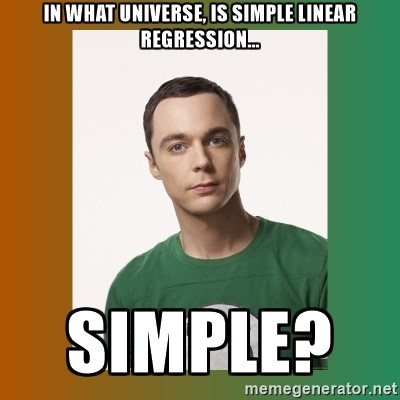

Regression Imputation is method in which we estimate the missing values by Regression using other variables as the parameters.



In [27]:
numerical_cols = [x for x in properties.columns if x not in categorical_cols]
categorical_cols = [x for x in properties.columns if x not in numerical_cols]

Lets fill tax related columns missing values using Regression.

So there are four tax related columns -

1. taxvaluedollarcnt - The total tax assessed value of the parcel
2. landtaxvaluedollarcnt -  The assessed value of the land area of the parcel
3. taxamount - The total property tax assessed for that assessment year.
4. structuretaxvaluedollarcnt - The assessed value of the built structure on the parcel
 

In [28]:
properties[['taxvaluedollarcnt','landtaxvaluedollarcnt','taxamount','structuretaxvaluedollarcnt']].corr()

,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,structuretaxvaluedollarcnt
taxvaluedollarcnt,1.000000,0.844842,0.985945,0.885595
landtaxvaluedollarcnt,0.844842,1.000000,0.808594,0.500127
taxamount,0.985945,0.808594,1.000000,0.887049
structuretaxvaluedollarcnt,0.885595,0.500127,0.887049,1.000000


taxamount and taxvaluedollarcnt are highly correlated (0.97), so we will delete one of them.

I am keeping taxamount as it has less missing values.

In [29]:
properties.drop(['taxvaluedollarcnt'],axis=1,inplace=True)

In [30]:
numerical_cols=numerical_cols.remove('taxvaluedollarcnt')

Initially imputing all the variables with missing values using some trivial methods like Simple Random Imputation (we impute the missing data with random observed values of the variable) which is later followed by Regression Imputation of each of the variables iteratively.

In [31]:
missing_columns_regr=['landtaxvaluedollarcnt','taxamount','structuretaxvaluedollarcnt']

The function **random_imputation** replaces the missing values with some random observed values of the variable. The method is repeated for all the variables containing missing values, after which they serve as parameters in the regression model to estimate other variable values.

**Simple Random Imputation** is one of the crude methods since it ignores all the other available data and thus it's very rarely used. But it serves as a good starting point for regression imputation.


In [32]:
def random_imputation(df, feature):
    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True) 
    return df

In [33]:
for feature in missing_columns_regr:
    properties[feature + '_imp'] = properties[feature]
    properties = random_imputation(properties, feature)

Now we replace the missing data with the values predicted in our regression model and repeat this process for each variable.

In [34]:
non_missing_values_columns=properties.columns[~properties.isnull().any()]
non_missing_num_columns=list(set(non_missing_values_columns)-set(categorical_cols))


In [35]:
deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns_regr])

for feature in missing_columns_regr:
        
    deter_data["Det" + feature] = properties[feature + "_imp"]
    parameters = list(set(non_missing_num_columns) - {feature + '_imp'})
    
    #Create a Linear Regression model to estimate the missing data
    model = linear_model.LinearRegression()
    model.fit(X = properties[parameters], y = properties[feature + '_imp'])
    
    #observe that I preserve the index of the missing data from the original dataframe
    deter_data.loc[properties[feature].isnull(), "Det" + feature] = model.predict(properties[parameters])[properties[feature].isnull()]

In [36]:
properties[missing_columns_regr]=deter_data[["Detlandtaxvaluedollarcnt", "Dettaxamount","Detstructuretaxvaluedollarcnt"]]
properties.drop(['landtaxvaluedollarcnt_imp','taxamount_imp','structuretaxvaluedollarcnt_imp'],axis=1,inplace=True)

### 2. K Nearest Neighbour (KNN) Imputation

KNN used to partition the objects which are similar 
within groups and are dissimilar with each other.k-nn, is an approach that estimates how likely a data point is to be a member of one group or the other depending on what group the data points nearest to it are in.

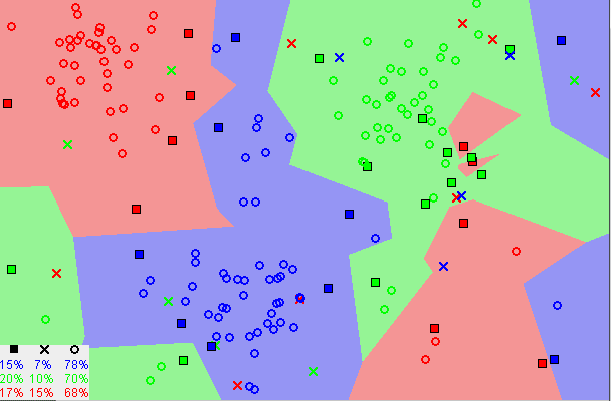

**function to impute missing values using KNN**

In [37]:
def impute_knn(df,target):
  imputer = KNNImputer(n_neighbors=1)
  res=imputer.fit_transform(df[['longitude','latitude',target]],y=df[target])
  df_knn_imputed=pd.DataFrame(res,columns=['longitude','latitude',target])
  return df_knn_imputed


**function to deal with variables that are actually string/categories**

In [38]:
def zoningcode2int( df, target ):
    storenull = df[target ].isnull()
    enc = LabelEncoder( )
    df[ target ] = df[target ].astype( str )
    df[target ]= enc.fit_transform( df[ target ].values )
    print( 'num of categories: ', enc.classes_.shape  )
    df.loc[ storenull, target ] = np.nan
    return enc

**Impute regionidcity**

In [ ]:
df_knn_imputed=impute_knn(properties,'regionidcity')
properties['regionidcity']=df_knn_imputed['regionidcity']

 **Impute propertyzoningdesc**

In [ ]:
zoningcode2int(properties,'propertyzoningdesc')

df_knn_imputed=impute_knn(properties,'propertyzoningdesc')
properties['propertyzoningdesc']=df_knn_imputed['propertyzoningdesc']

**Impute propertycountylandusecode**

In [ ]:
zoningcode2int(properties,'propertycountylandusecode')

df_knn_imputed=impute_knn(properties,'propertycountylandusecode')
properties['propertycountylandusecode']=df_knn_imputed['propertycountylandusecode']

**Impute regionidneighborhood**

In [ ]:
df_knn_imputed=impute_knn(properties,'regionidneighborhood')
properties['regionidneighborhood']=df_knn_imputed['regionidneighborhood']

**Impute regionidzip**

In [ ]:

df_knn_imputed=impute_knn(properties,'regionidzip')
properties['regionidzip']=df_knn_imputed['regionidzip']

**Impute unitcnt**

In [ ]:

df_knn_imputed=impute_knn(properties,'unitcnt')
properties['unitcnt']=df_knn_imputed['unitcnt']

**Impute yearbuilt**

In [ ]:
df_knn_imputed=impute_knn(properties,'yearbuilt')
properties['yearbuilt']=df_knn_imputed['yearbuilt']

**Impute lotsizesquarefeet**

In [ ]:
df_knn_imputed=impute_knn(properties,'lotsizesquarefeet')
properties['lotsizesquarefeet']=df_knn_imputed['lotsizesquarefeet']